In [1]:
algorithms = [
    #"_AGEMOEA_0", "_DNSGA2_0",  "_NSGA2_0", "_NSGA3_0", "_RNSGA2_0", "_SMSEMOA_0", "_SPEA2_0",
    #"_AGEMOEA_1",  "_DNSGA2_1",  "_NSGA2_1", "_NSGA3_1", "_RNSGA2_1", "_SMSEMOA_1", "_SPEA2_1",
    "_AGEMOEA_2",  "_DNSGA2_2",  "_NSGA2_2", "_NSGA3_2", "_RNSGA2_2", "_SMSEMOA_2", "_SPEA2_2",
    #"_AGEMOEA_3",  "_DNSGA2_3",  "_NSGA2_3", "_NSGA3_3", "_RNSGA2_3", "_SMSEMOA_3", "_SPEA2_3",
    #"_AGEMOEA_4",  "_DNSGA2_4",  "_NSGA2_4", "_NSGA3_4", "_RNSGA2_4", "_SMSEMOA_4", "_SPEA2_4"
]

In [5]:
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter

Processing AGEMOEA_4...


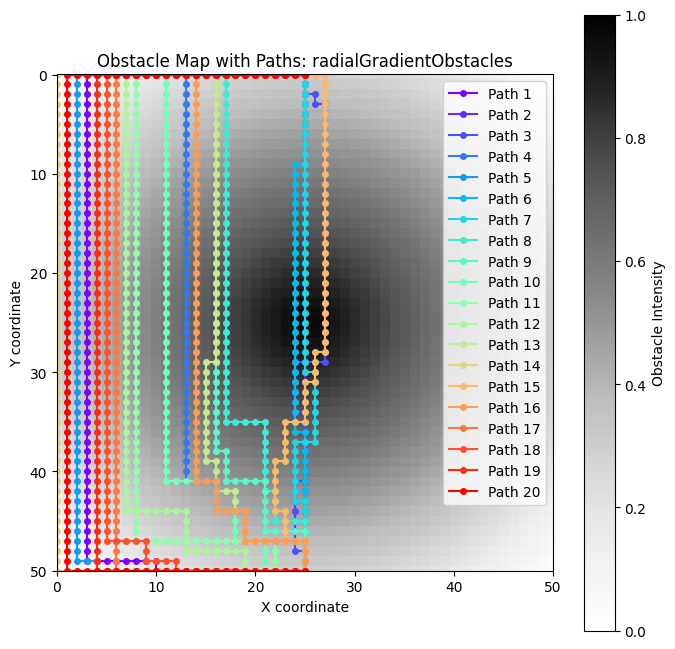

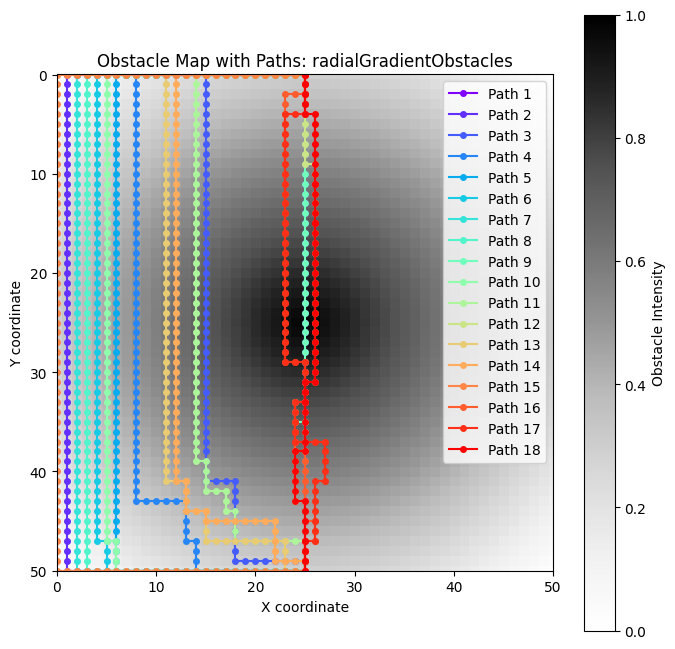

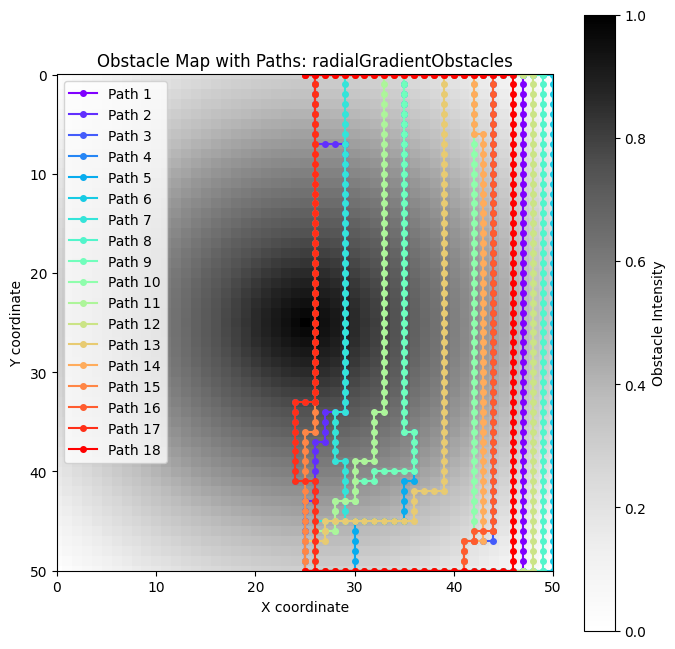

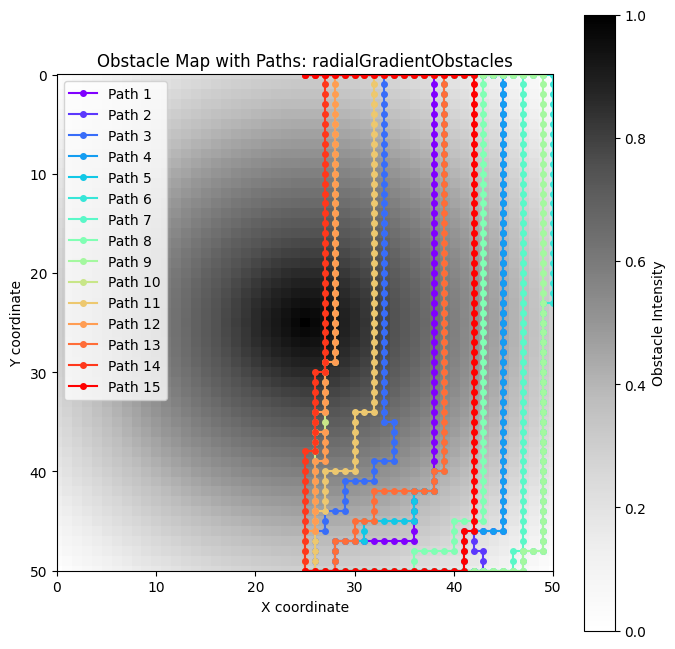

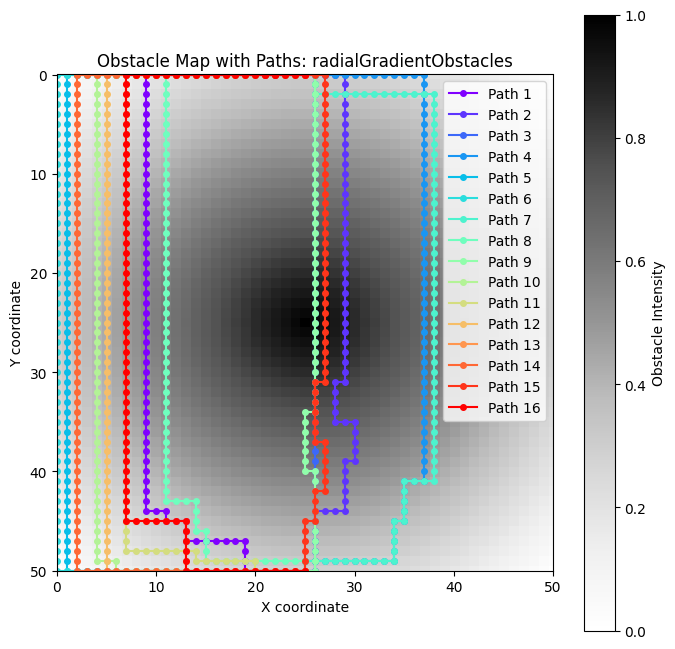

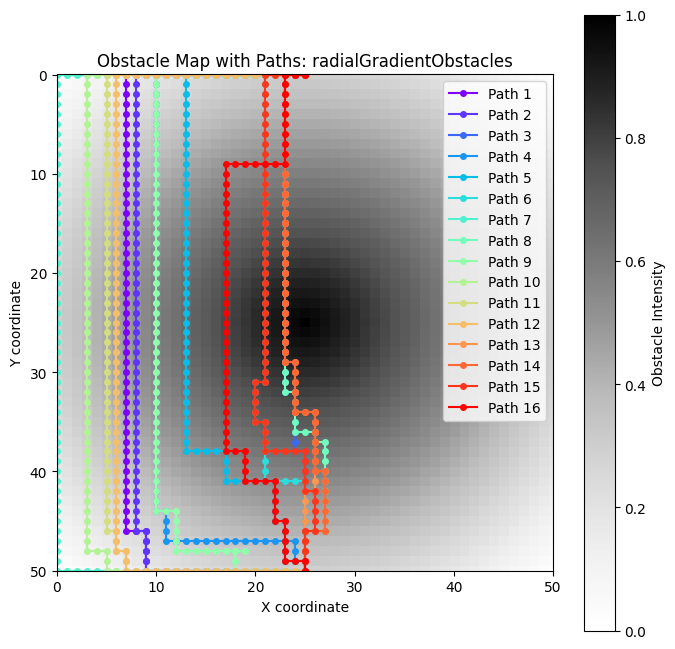

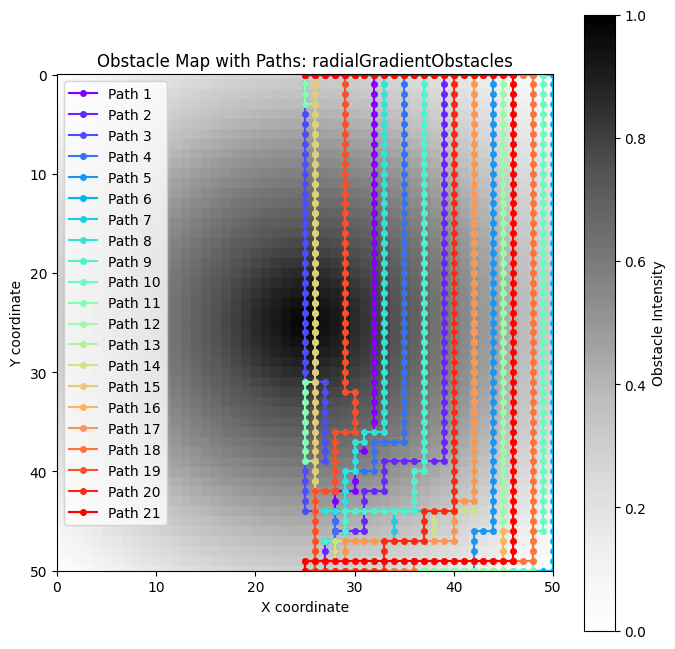

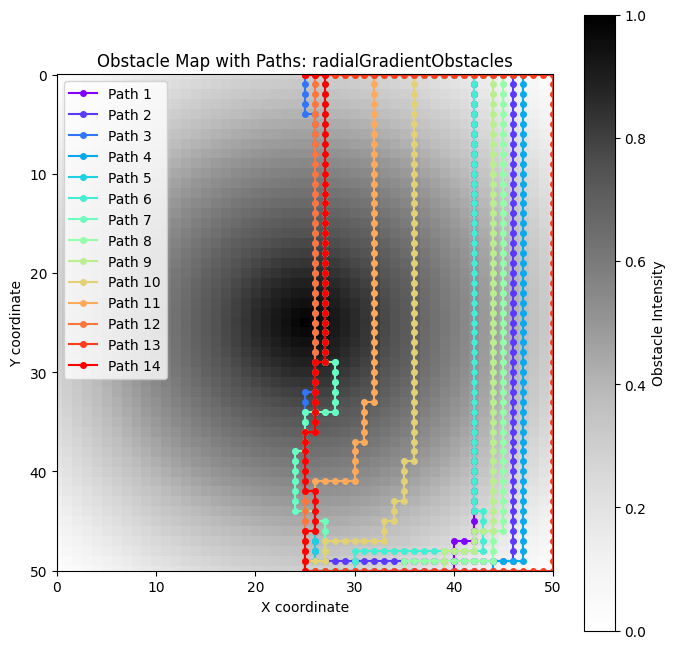

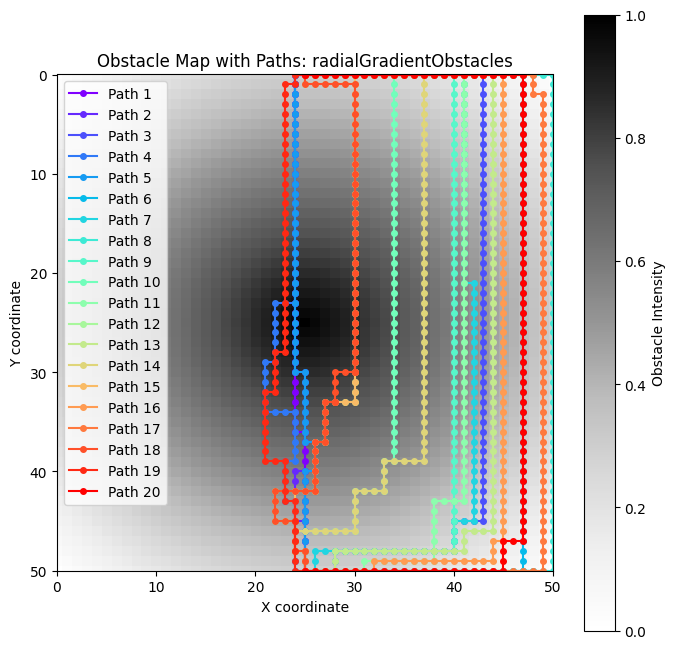

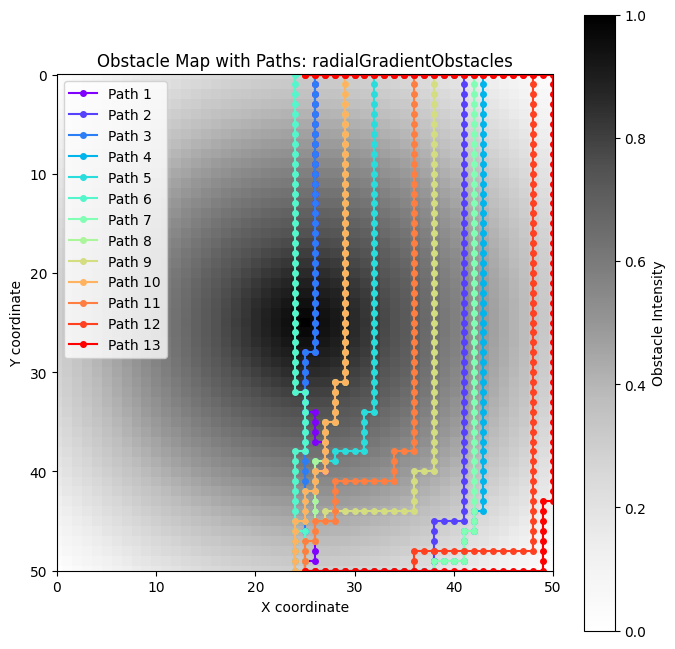

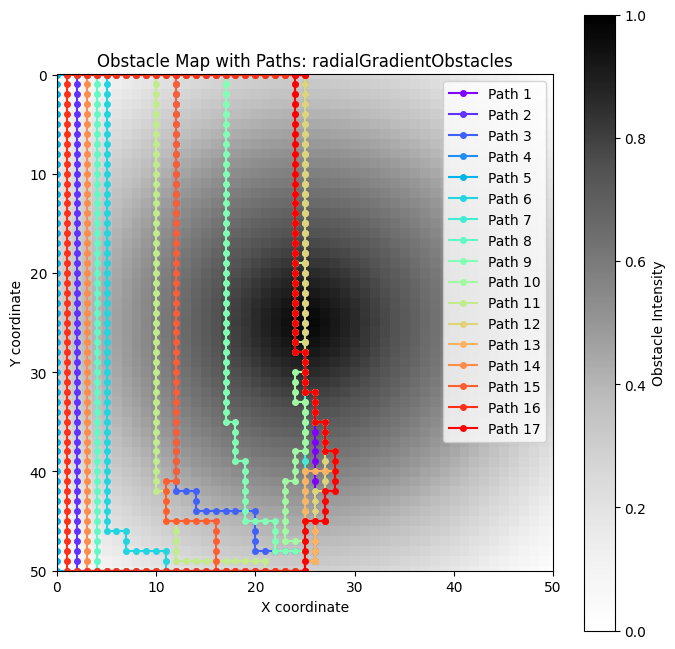

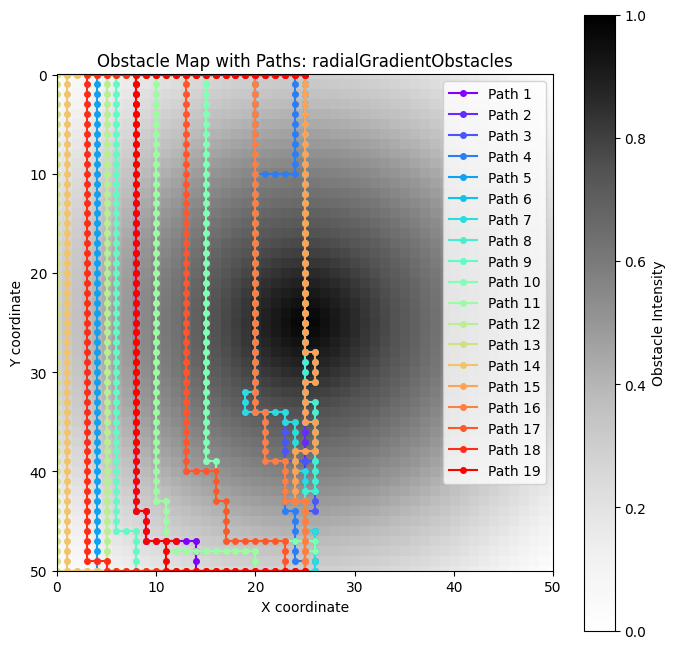

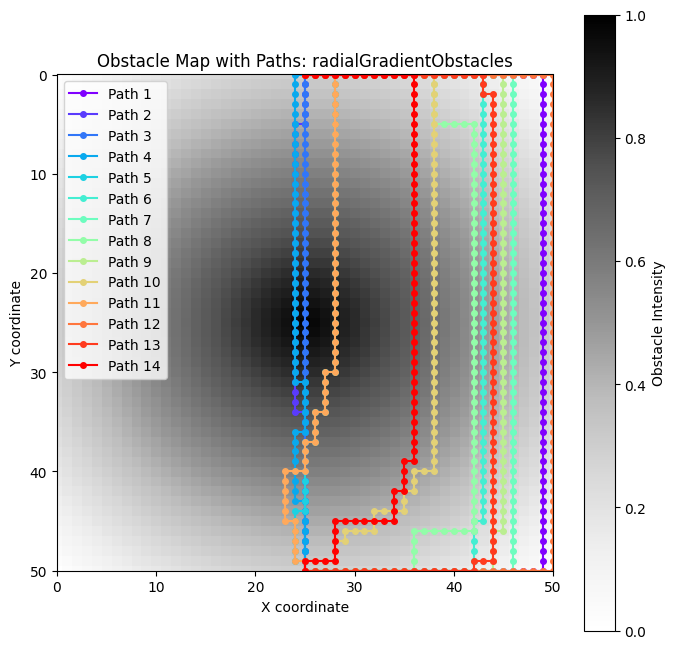

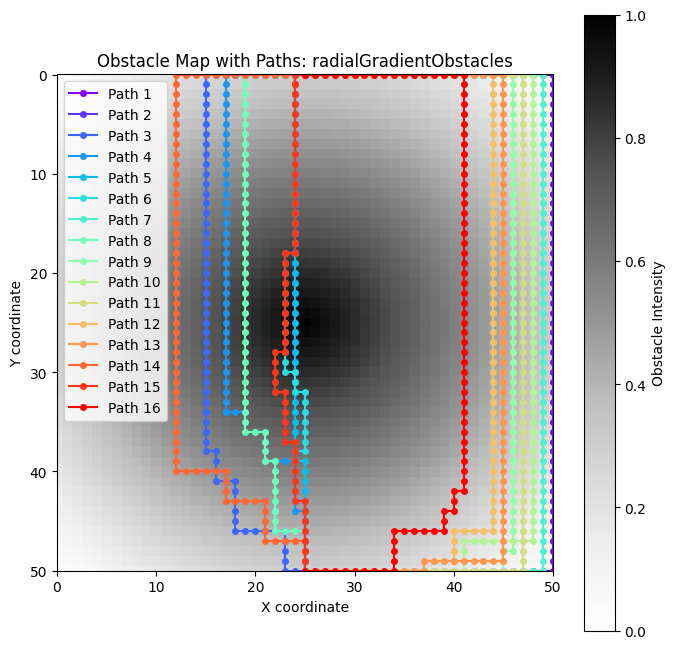

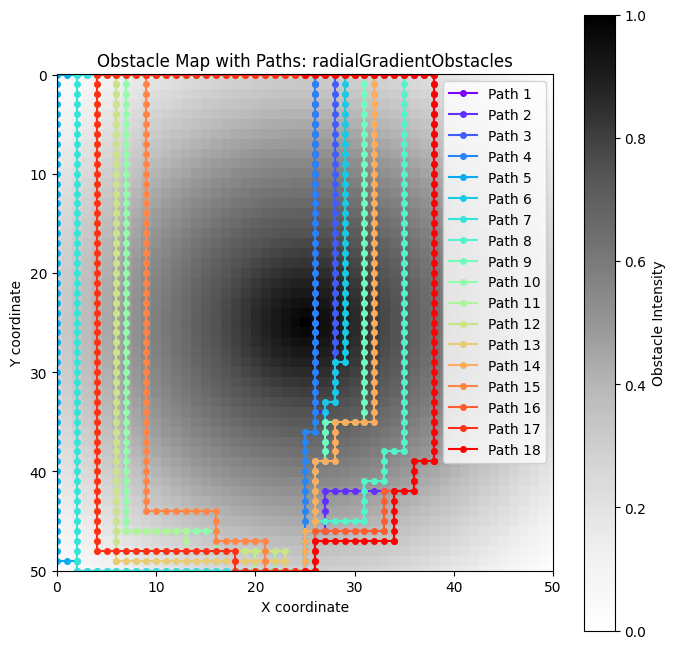

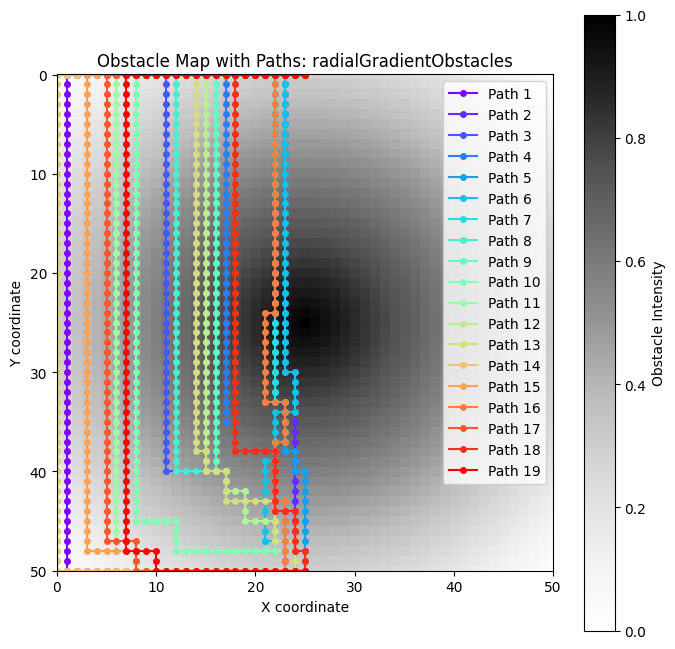

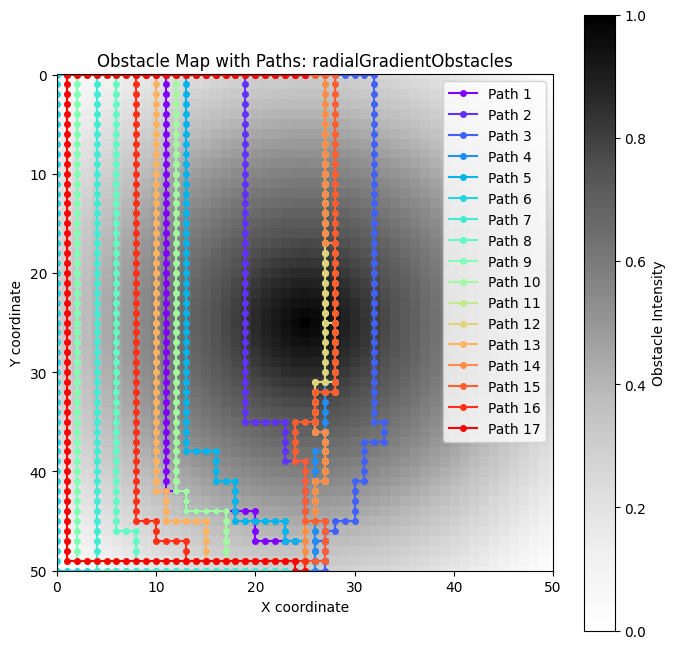

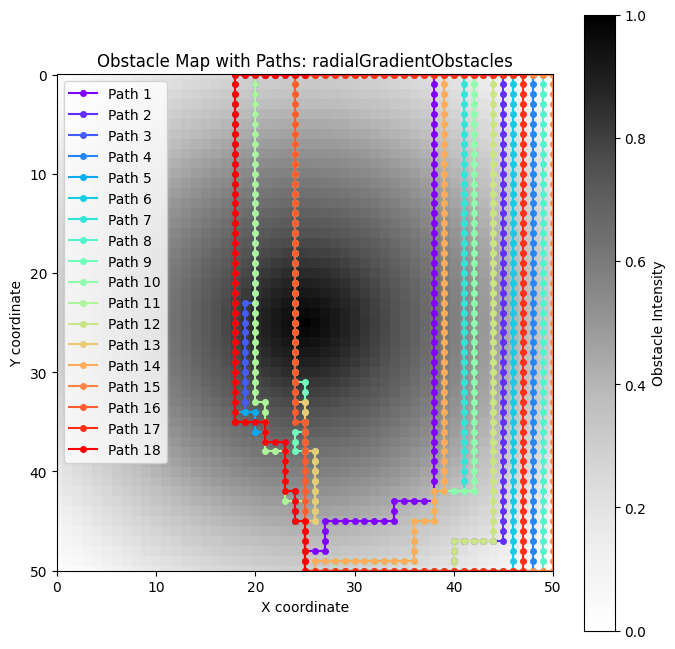

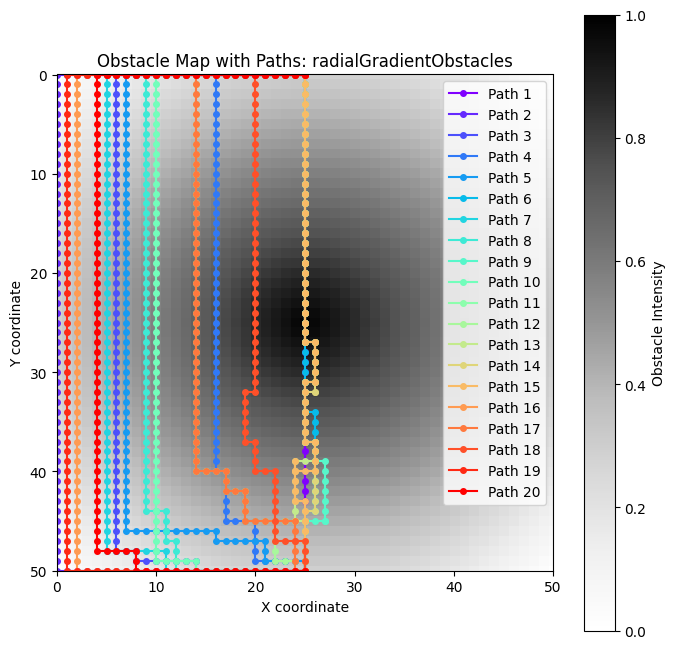

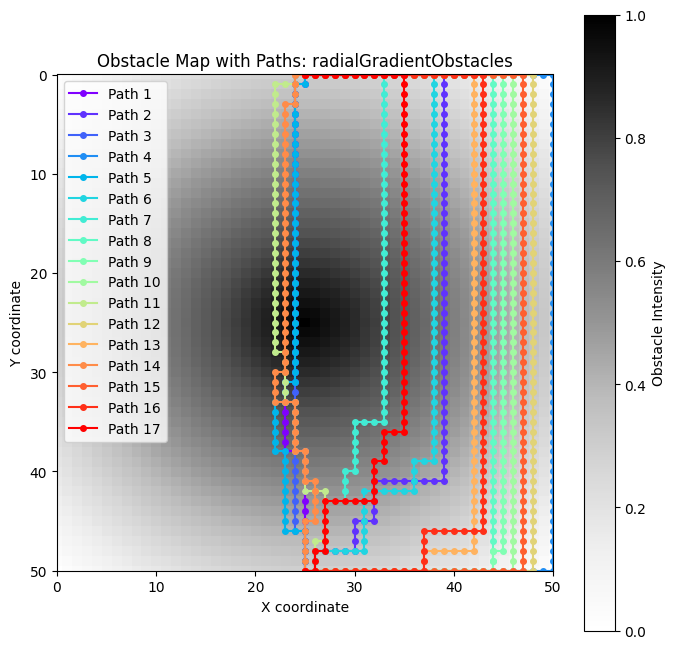

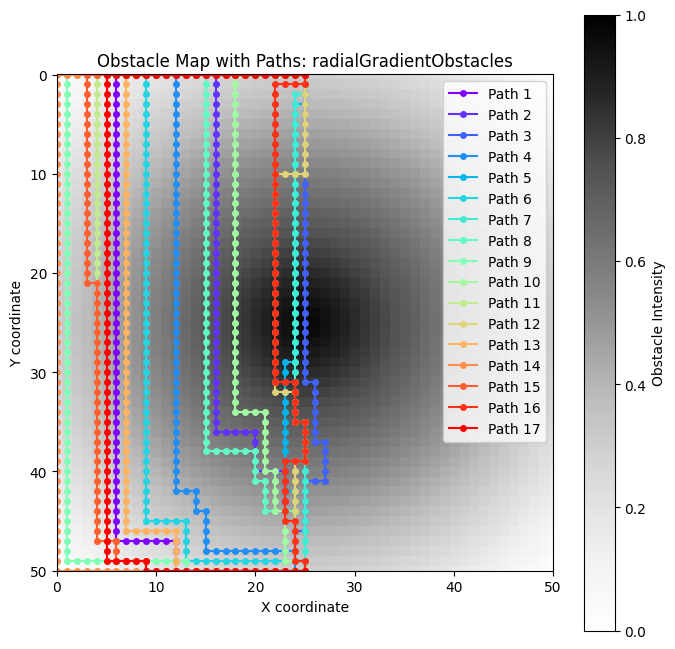

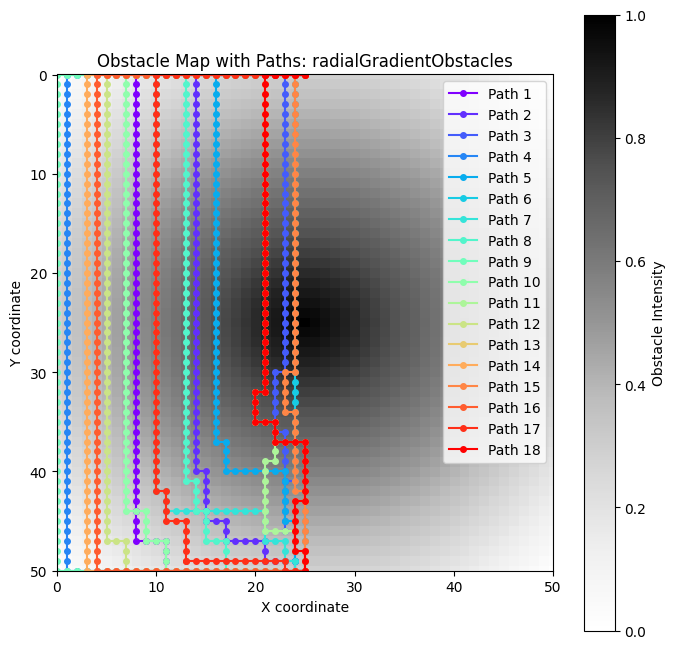

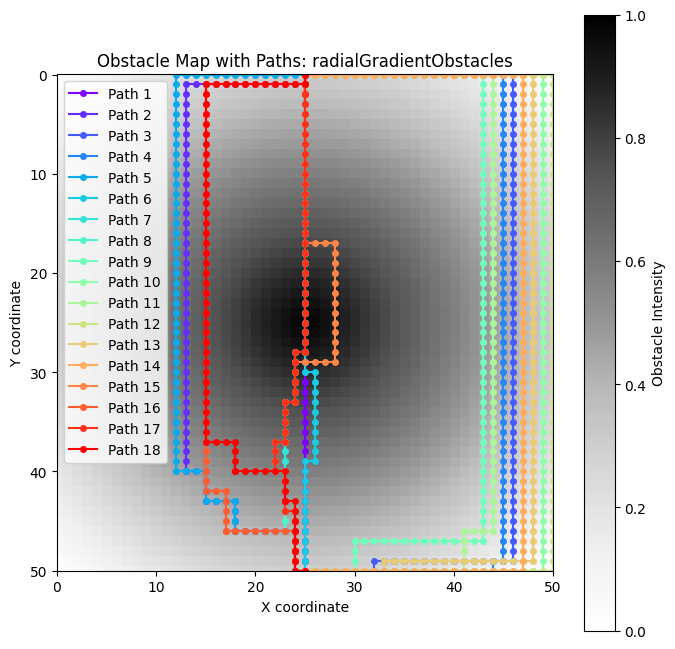

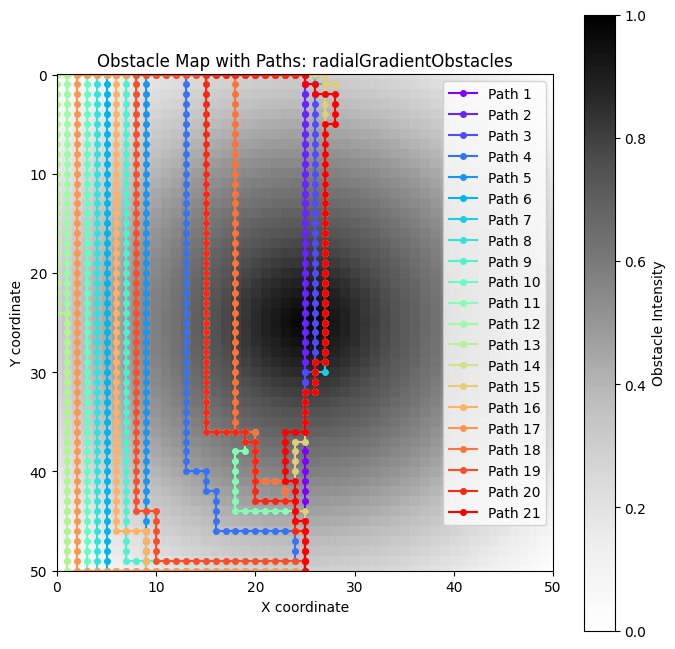

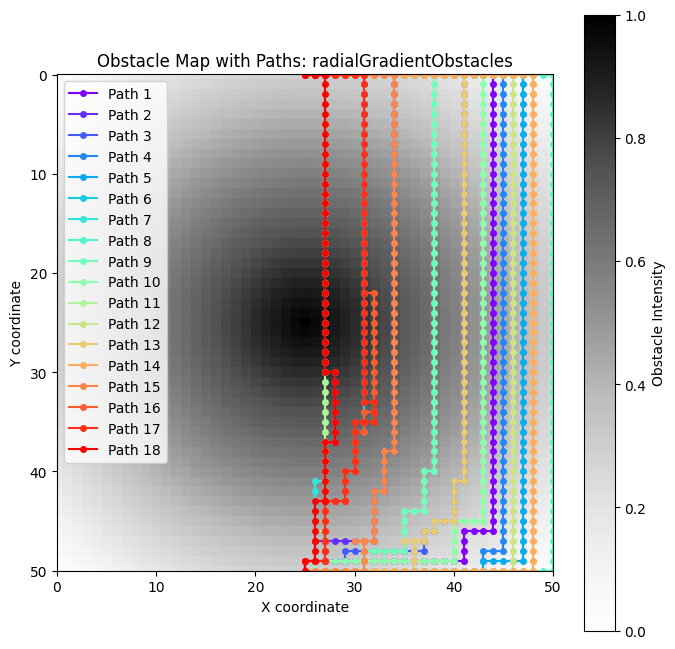

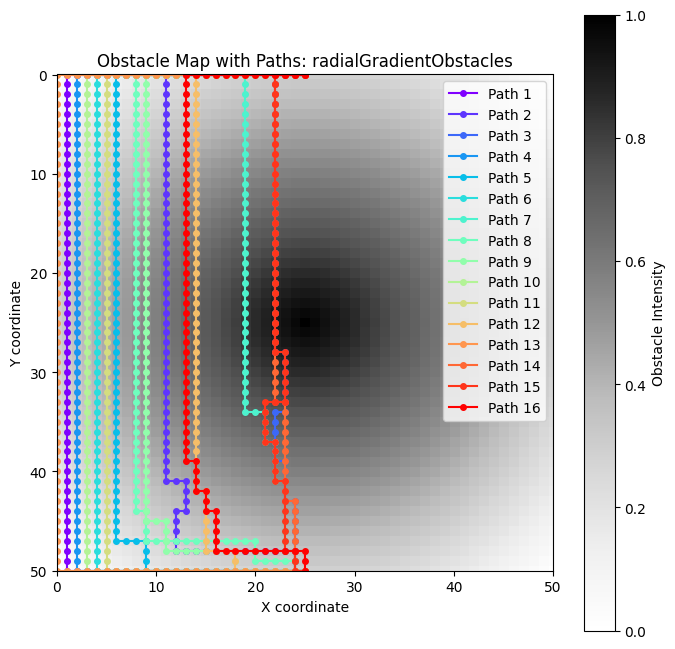

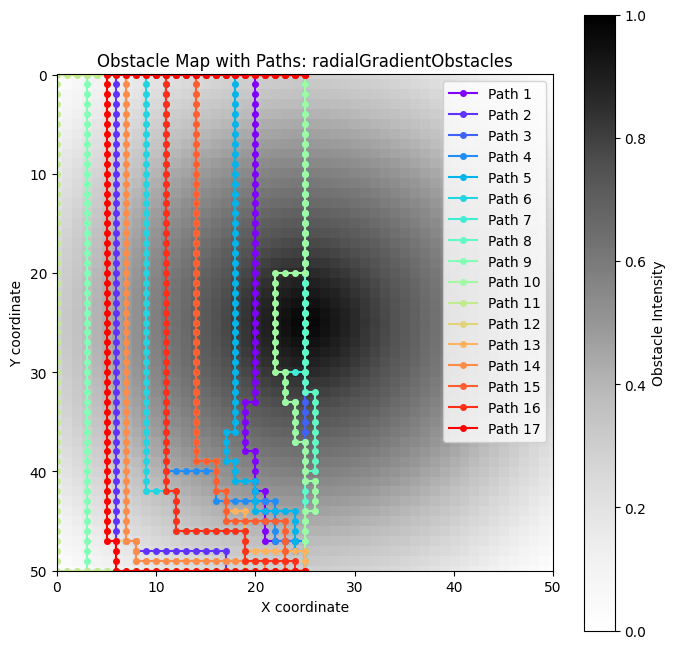

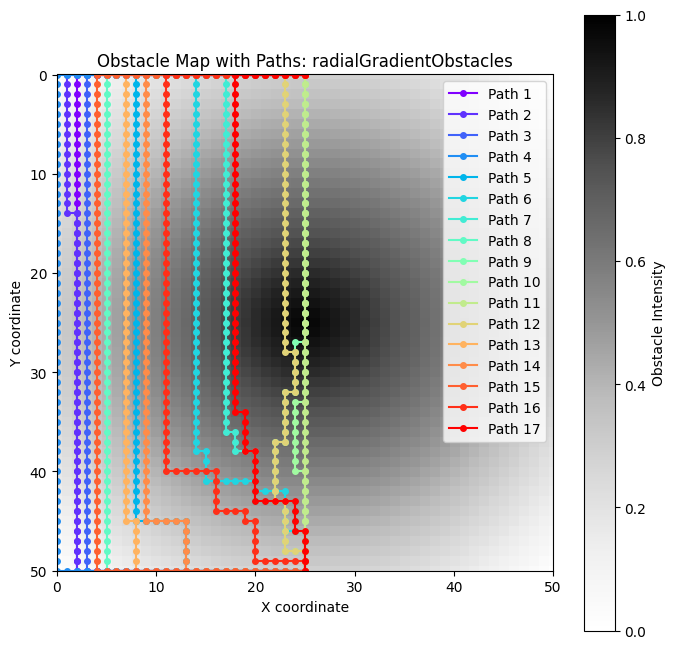

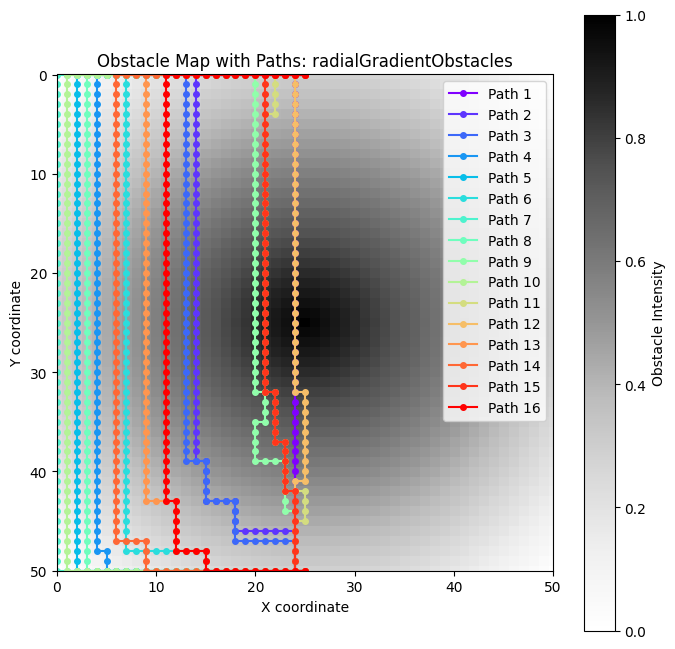

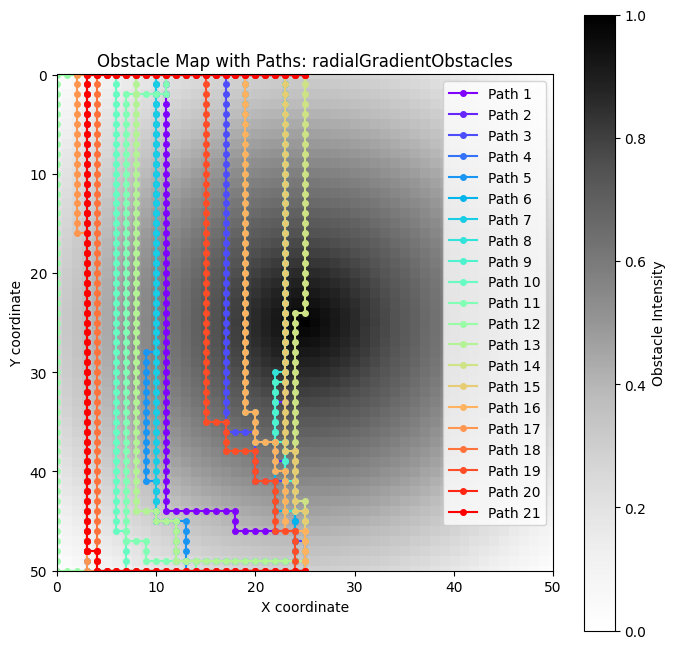

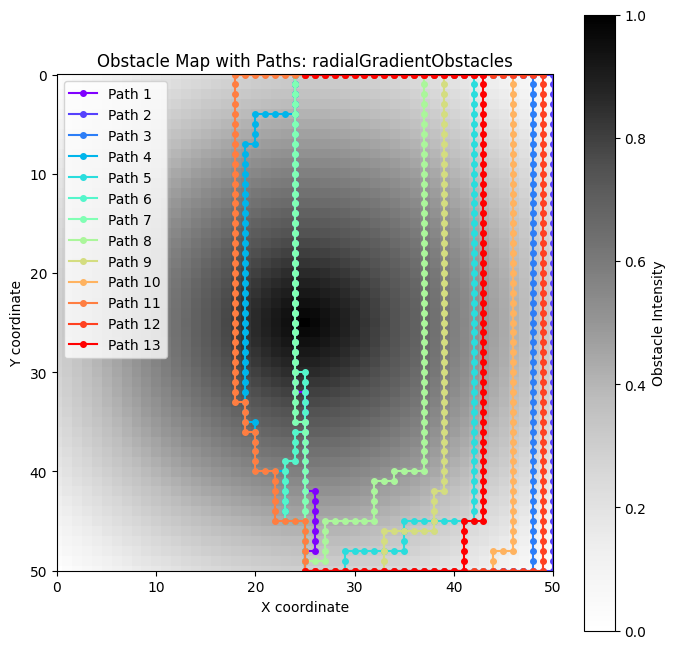

Processing DNSGA2_4...


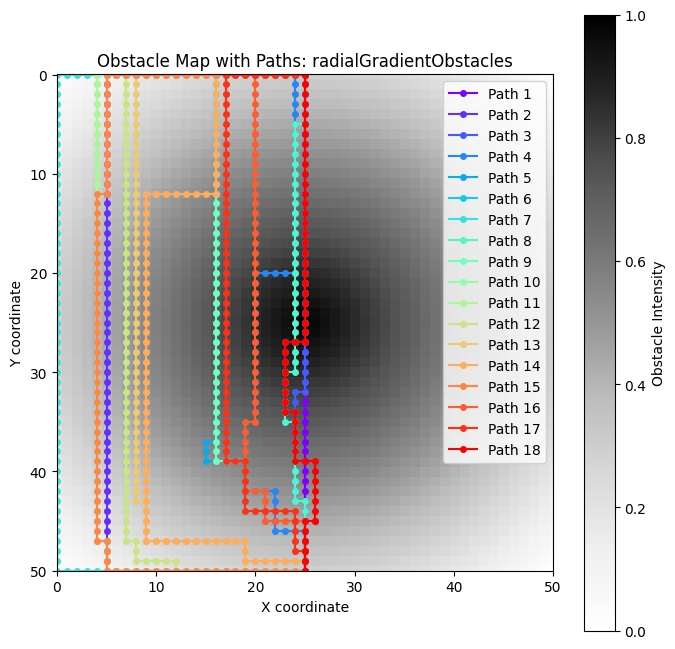

KeyboardInterrupt: 

In [2]:
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter

class ObstacleMapGenerator:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def create_meandering_river_obstacles(self):
        # Initialize the obstacle map
        obstacles = np.zeros((self.height, self.width))

        # Parameters for the river path
        river_width = 7
        t = np.linspace(0, 1, self.height)
        x_center = self.width / 2
        amplitude = self.width / 3

        # Generate smooth S-shaped path
        x_path = x_center + amplitude * np.sin(2 * np.pi * t)

        # Mark the river path on the obstacle map
        for y, x in enumerate(x_path):
            x_start = int(x - river_width / 2)
            x_end = int(x + river_width / 2)
            obstacles[y, max(x_start, 0):min(x_end, self.width)] = 1

        # Apply Gaussian filter to create gradient effect
        obstacles = gaussian_filter(obstacles, sigma=3)

        # Invert colors: black parts white and white parts black
        obstacles = 1 - obstacles

        # Normalize to 0-1 range
        obstacles = (obstacles - np.min(obstacles)) / (np.max(obstacles) - np.min(obstacles))

        return obstacles

    def create_radial_gradient_obstacles(self):
        # Center of the grid
        center_x, center_y = self.width // 2, self.height // 2

        # Create a distance matrix from the center
        x = np.arange(self.width)
        y = np.arange(self.height)
        xx, yy = np.meshgrid(x, y)
        distances = np.sqrt((xx - center_x)**2 + (yy - center_y)**2)

        # Normalize distances to range [0, 1]
        normalized_distances = distances / np.max(distances)

        # Invert the distances to create a gradient from center to edges
        radial_gradient = 1 - normalized_distances

        return radial_gradient

    def create_sinusoidal_obstacles(self):
        # x*pi -> with that x, the number of peaks and valleys can be altered
        x = np.linspace(0, 5 * np.pi, self.width)
        y = np.linspace(0, 5 * np.pi, self.height)
        x, y = np.meshgrid(x, y)
        # combining sine and cosine functions
        sinusoidal_obstacles = np.sin(x) * np.cos(y)
        # Normalize to 0-1 range
        sinusoidal_obstacles = (sinusoidal_obstacles - sinusoidal_obstacles.min()) / (sinusoidal_obstacles.max() - sinusoidal_obstacles.min())
        return sinusoidal_obstacles

    def create_gradient_obstacles(self):
        gradient = np.zeros((self.height, self.width))

        for i in range(self.height):
            for j in range(self.width):
                # Calculate the distance to the middle diagonal
                distance_to_diagonal = abs(i - j)
                max_distance = max(self.height, self.width) - 1
                normalized_distance = distance_to_diagonal / max_distance
                # The farther from the diagonal, the higher the value, reversed
                gradient[i, j] = 0.5 * (1 - normalized_distance)
                
                # Adjust for bottom right corner
                if i > j:
                    gradient[i, j] = 1 - gradient[i, j]
                else:
                    gradient[i, j] = gradient[i, j]
        
        return gradient

    def plot_obstacles_and_paths(self, map_name, paths):
        # Create the obstacle map based on the specified name
        if map_name == "meanderingRiverObstacles":
            obstacle_map = self.create_meandering_river_obstacles()
        elif map_name == "radialGradientObstacles":
            obstacle_map = self.create_radial_gradient_obstacles()
        elif map_name == "sinusoidalObstacles":
            obstacle_map = self.create_sinusoidal_obstacles()
        elif map_name == "gradientObstacles":
            obstacle_map = self.create_gradient_obstacles()
        else:
            raise ValueError(f"Unknown map name: {map_name}")

        # Plot the obstacle map in greyscale
        plt.figure(figsize=(8, 8))
        plt.imshow(obstacle_map, cmap='Greys', interpolation='nearest')

        # Generate a colormap with a unique color for each path
        colors = cm.rainbow(np.linspace(0, 1, len(paths)))

        # Overlay the paths
        for i, path in enumerate(paths):
            if path:
                x_coords, y_coords = zip(*path)
                plt.plot(y_coords, x_coords, marker='o', markersize=4, color=colors[i], label=f'Path {i+1}')

        plt.xlim(0, self.width-1)
        plt.ylim(0, self.height-1)
        plt.gca().invert_yaxis()  # Invert y-axis to match typical grid orientation
        plt.title(f'Obstacle Map with Paths: {map_name}')
        plt.xlabel('X coordinate')
        plt.ylabel('Y coordinate')
        plt.colorbar(label='Obstacle Intensity')
        plt.grid(False)
        plt.legend()
        plt.show()

# Define the root folder path
root_folder = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/radialGradientMap'

# Consolidate all desired algorithm names


# Function to split the paths based on the criteria provided
def split_paths(paths):
    split_paths = []
    current_path = []

    for i in range(len(paths)):
        current_path.append(paths[i])
        if i < len(paths) - 1 and paths[i] == (0, 25) and paths[i + 1] == (50, 25):
            split_paths.append(current_path)
            current_path = []
    
    # Append the last path if not already added
    if current_path:
        split_paths.append(current_path)
    
    return split_paths

# Initialize obstacle map generator
generator = ObstacleMapGenerator(width=51, height=51)

# Process each algorithm
for algo in algorithms:
    print(f"Processing {algo.strip('_')}...")
    
    # Iterate through all subfolders
    for subdir, _, files in os.walk(root_folder):
        if algo.strip('_') in os.path.basename(subdir):  # Exact match check
            for file in files:
                if file == 'optLog.csv':
                    file_path = os.path.join(subdir, file)
                    try:
                        df = pd.read_csv(file_path)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")
                        continue

                    # Extract paths from the last row (final generation)
                    last_row = df.iloc[-1]
                    paths_str = last_row[' paths']
                    try:
                        paths = ast.literal_eval(paths_str)
                    except Exception as e:
                        print(f"Error parsing paths in {file_path}: {e}")
                        continue
                    
                    # Split the paths based on the provided criteria
                    paths = split_paths(paths)
                    
                    # Plot obstacle map and paths
                    generator.plot_obstacles_and_paths("radialGradientObstacles", paths)


Processing AGEMOEA_5...


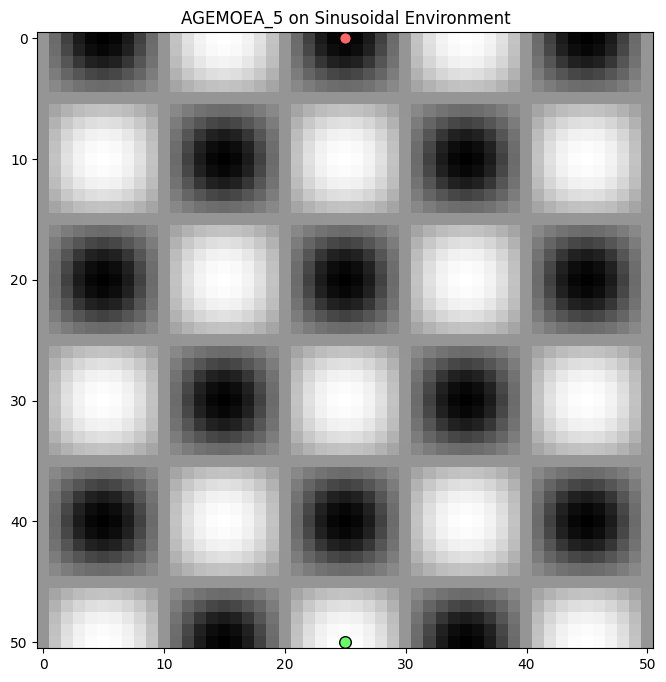

In [10]:
# original code for plotting blue connected paths
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter

class ObstacleMapGenerator:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def create_meandering_river_obstacles(self):
        obstacles = np.zeros((self.height, self.width))
        river_width = 7
        t = np.linspace(0, 1, self.height)
        x_center = self.width / 2
        amplitude = self.width / 3
        x_path = x_center + amplitude * np.sin(2 * np.pi * t)
        for y, x in enumerate(x_path):
            x_start = int(x - river_width / 2)
            x_end = int(x + river_width / 2)
            obstacles[y, max(x_start, 0):min(x_end, self.width)] = 1
        obstacles = gaussian_filter(obstacles, sigma=3)
        obstacles = 1 - obstacles
        obstacles = (obstacles - np.min(obstacles)) / (np.max(obstacles) - np.min(obstacles))
        return obstacles

    def create_radial_gradient_obstacles(self):
        center_x, center_y = self.width // 2, self.height // 2
        x = np.arange(self.width)
        y = np.arange(self.height)
        xx, yy = np.meshgrid(x, y)
        distances = np.sqrt((xx - center_x)**2 + (yy - center_y)**2)
        normalized_distances = distances / np.max(distances)
        radial_gradient = 1 - normalized_distances
        return radial_gradient

    def create_sinusoidal_obstacles(self):
        x = np.linspace(0, 5 * np.pi, self.width)
        y = np.linspace(0, 5 * np.pi, self.height)
        x, y = np.meshgrid(x, y)
        sinusoidal_obstacles = np.sin(x) * np.cos(y)
        sinusoidal_obstacles = (sinusoidal_obstacles - sinusoidal_obstacles.min()) / (sinusoidal_obstacles.max() - sinusoidal_obstacles.min())
        return sinusoidal_obstacles

    def create_gradient_obstacles(self):
        gradient = np.zeros((self.height, self.width))
        for i in range(self.height):
            for j in range(self.width):
                distance_to_diagonal = abs(i - j)
                max_distance = max(self.height, self.width) - 1
                normalized_distance = distance_to_diagonal / max_distance
                gradient[i, j] = 0.5 * (1 - normalized_distance)
                if i > j:
                    gradient[i, j] = 1 - gradient[i, j]
                else:
                    gradient[i, j] = gradient[i, j]
        return gradient

    def plot_obstacles_and_paths(self, map_name, all_paths, algo):
        if map_name == "River Environment":
            obstacle_map = self.create_meandering_river_obstacles()
        elif map_name == "Radial Gradient Environment":
            obstacle_map = self.create_radial_gradient_obstacles()
        elif map_name == "Sinusoidal Environment":
            obstacle_map = self.create_sinusoidal_obstacles()
        elif map_name == "Linear Gradient Environment":
            obstacle_map = self.create_gradient_obstacles()
        else:
            raise ValueError(f"Unknown map name: {map_name}")

        plt.figure(figsize=(8, 8))
        plt.imshow(obstacle_map, cmap='Greys', interpolation='nearest')

        colors = cm.rainbow(np.linspace(0, 1, len(all_paths)))

        for i, paths in enumerate(all_paths):
            if paths:
                for path in paths:
                    x_coords, y_coords = zip(*path)
                    plt.plot(y_coords, x_coords, marker='o', markersize=2, color=colors[i])

        plt.xlim(-0.5, self.width-0.5)
        plt.ylim(-0.5, self.height-0.5)
        plt.gca().invert_yaxis()
        plt.title(f'{algo} on {map_name}')  # Use the cleaned algorithm name here
        #plt.xlabel('X coordinate')
        #plt.ylabel('Y coordinate')
        #plt.colorbar(label='Obstacle Weight')
        plt.grid(False)
        coordinates = [(25, 50), (25, 0)]  # Replace with your specific coordinates
        colors = ['#66FF66', '#FF6666']
        for (x, y), color in zip(coordinates, colors):
            plt.scatter(x, y, color=color, s=70, zorder=5, edgecolors='black')  # Adjust 's' for marker size

        plt.show()


def split_paths(paths):
    split_paths = []
    current_path = []

    for i in range(len(paths)):
        current_path.append(paths[i])
        if i < len(paths) - 1 and paths[i] == (0, 25) and paths[i + 1] == (50, 25):
            split_paths.append(current_path)
            current_path = []
    
    if current_path:
        split_paths.append(current_path)
    
    return split_paths

def process_algorithms(root_folder, algorithms, map_name):
    for algo in algorithms:
        algo_stripped = algo.strip('_')[:-2].rstrip('_')  # Clean the algorithm name
        print(f"Processing {algo_stripped}...")
        all_paths = []
        for subdir, _, files in os.walk(root_folder):
            if algo in os.path.basename(subdir):
                for file in files:
                    if file == 'optLog.csv':
                        file_path = os.path.join(subdir, file)
                        try:
                            df = pd.read_csv(file_path)
                        except Exception as e:
                            print(f"Error reading {file_path}: {e}")
                            continue

                        last_row = df.iloc[-1]
                        paths_str = last_row[' paths']
                        try:
                            paths = ast.literal_eval(paths_str)
                        except Exception as e:
                            print(f"Error parsing paths in {file_path}: {e}")
                            continue

                        paths = split_paths(paths)
                        all_paths.extend(paths)

        # Initialize obstacle map generator
        generator = ObstacleMapGenerator(width=51, height=51)
        generator.plot_obstacles_and_paths(map_name, [all_paths], algo_stripped)  # Pass the cleaned algorithm name


# Define the root folder path
root_folder = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/data_analysis/equalNeighborWeightsResults/log_equal_neighbor_weigths/sinusoidalObstacles'

# List of algorithms
algorithms = [
    #"_AGEMOEA_0", "_DNSGA2_0",  "_NSGA2_0", "_NSGA3_0", "_RNSGA2_0", "_SMSEMOA_0", "_SPEA2_0"#,
    #"_AGEMOEA_1",  "_DNSGA2_1",  "_NSGA2_1", "_NSGA3_1", "_RNSGA2_1", "_SMSEMOA_1", "_SPEA2_1"
    #"_AGEMOEA_2",  "_DNSGA2_2",  "_NSGA2_2", "_NSGA3_2", "_RNSGA2_2", "_SMSEMOA_2", "_SPEA2_2"
    #"_AGEMOEA_3",  "_DNSGA2_3",  "_NSGA2_3", "_NSGA3_3", "_RNSGA2_3", "_SMSEMOA_3", "_SPEA2_3"#,
    #"_AGEMOEA_4",  "_DNSGA2_4",  "_NSGA2_4", "_NSGA3_4", "_RNSGA2_4", "_SMSEMOA_4", "_SPEA2_4"#,
    "_AGEMOEA_5",  "_DNSGA2_5",  "_NSGA2_5", "_NSGA3_5", "_RNSGA2_5", "_SMSEMOA_5", "_SPEA2_5"
]

# Specify the map name to use
map_name = "Sinusoidal Environment"

# Process algorithms and plot paths
process_algorithms(root_folder, algorithms, map_name)


In [ ]:
# List of algorithms
algorithms = [
    #"_AGEMOEA_0", "_DNSGA2_0",  "_NSGA2_0", "_NSGA3_0", "_RNSGA2_0", "_SMSEMOA_0", "_SPEA2_0"#,
    #"_AGEMOEA_1_42"#,  "_DNSGA2_1",  "_NSGA2_1", "_NSGA3_1", "_RNSGA2_1", "_SMSEMOA_1", "_SPEA2_1"
    #"_AGEMOEA_2",  "_DNSGA2_2",  "_NSGA2_2", "_NSGA3_2", "_RNSGA2_2", "_SMSEMOA_2", "_SPEA2_2"
    #"_AGEMOEA_3",  "_DNSGA2_3",  "_NSGA2_3", "_NSGA3_3", "_RNSGA2_3", "_SMSEMOA_3", "_SPEA2_3"#,
    #"_AGEMOEA_4",  "_DNSGA2_4",  "_NSGA2_4", "_NSGA3_4", "_RNSGA2_4", "_SMSEMOA_4", "_SPEA2_4"#,
    #"_AGEMOEA_5_42"#,  "_DNSGA2_5",  "_NSGA2_5", "_NSGA3_5", "_RNSGA2_5", "_SMSEMOA_5", "_SPEA2_5"
    
    #"_NSGA2_5", "_NSGA2_4", "_NSGA2_3", "_NSGA2_2", "_NSGA2_1", 
    #"_SPEA2_1", "_SPEA2_2", "_SPEA2_3", "_SPEA2_4", "_SPEA2_5"
    "_AGEMOEA_5", "_AGEMOEA_4", "_AGEMOEA_3", "_AGEMOEA_2", "_AGEMOEA_1", 
    "_DNSGA2_5", "_DNSGA2_4", "_DNSGA2_3", "_DNSGA2_2", "_DNSGA2_1", 
    "_NSGA3_5", "_NSGA3_4", "_NSGA3_3", "_NSGA3_2", "_NSGA3_1", 
    "_RNSGA2_5", "_RNSGA2_4", "_RNSGA2_3", "_RNSGA2_2", "_RNSGA2_1",
    "_SMSEMOA_5", "_SMSEMOA_4", "_SMSEMOA_3", "_SMSEMOA_2", "_SMSEMOA_1"
]

Processing NSGA2...


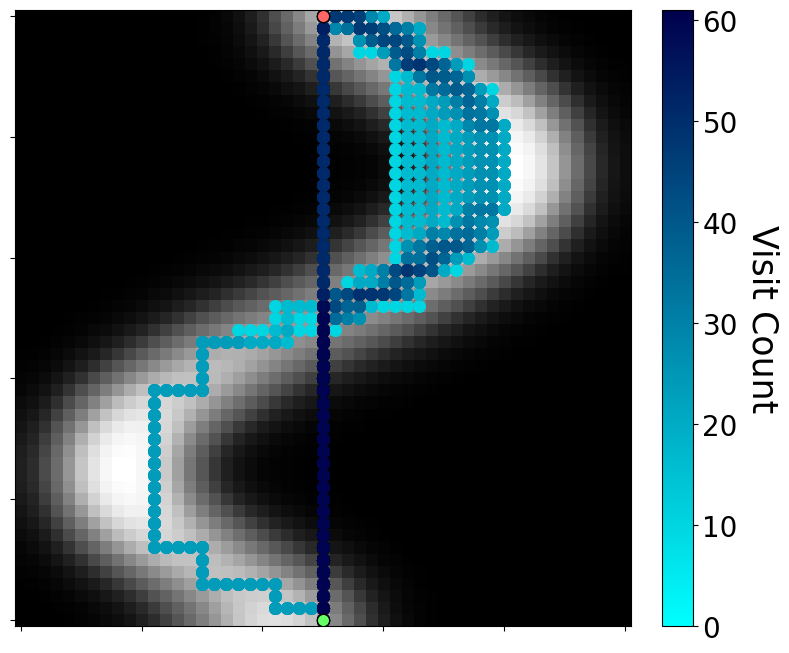

Processing SMSEMOA...


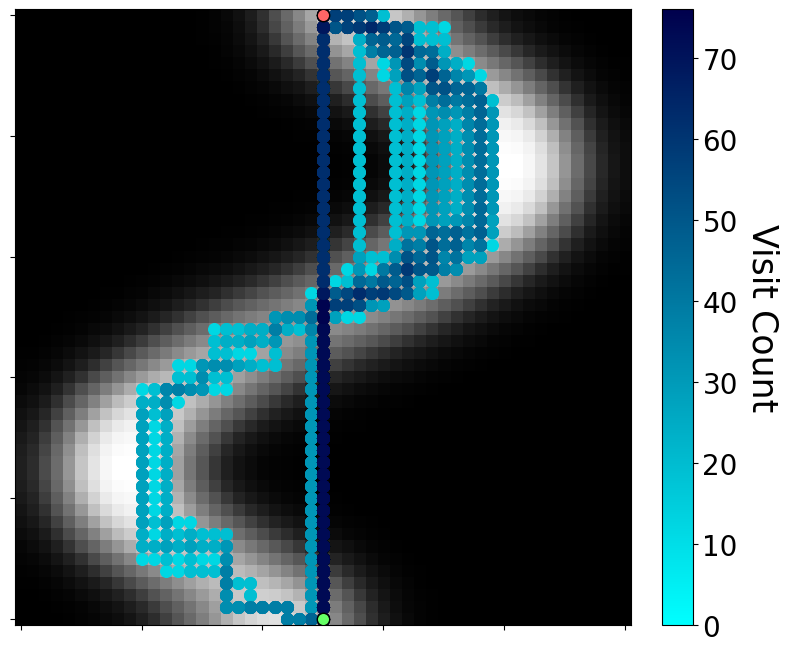

Processing AGEMOEA...


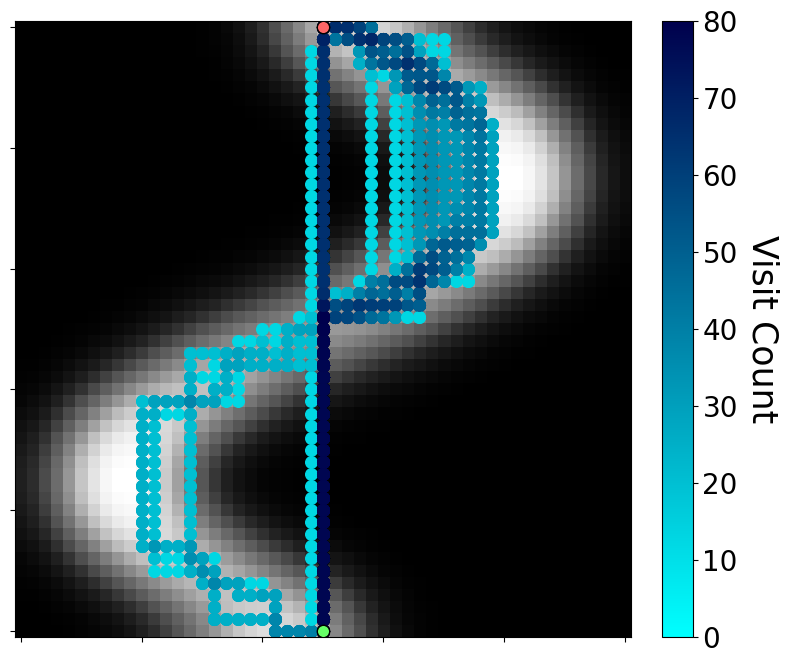

Processing DNSGA2...


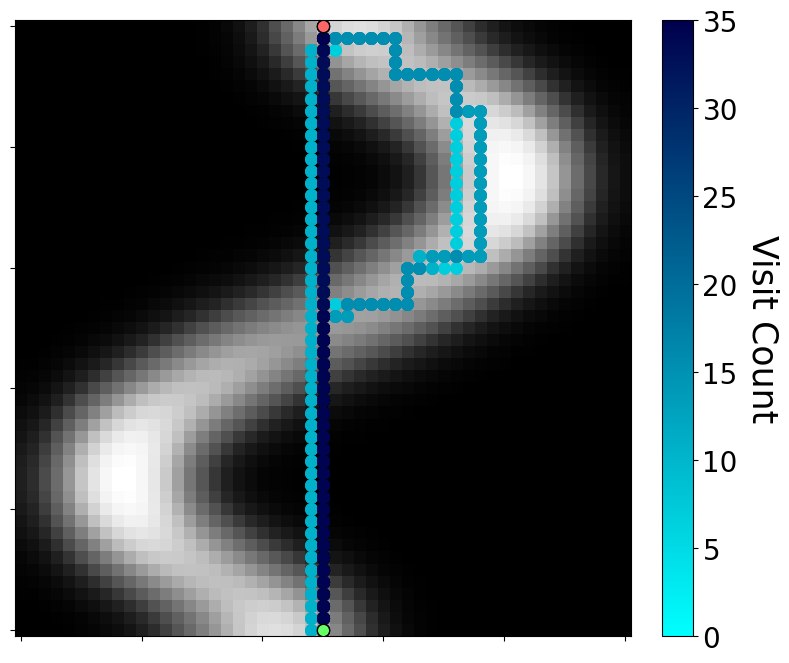

Processing RNSGA2...


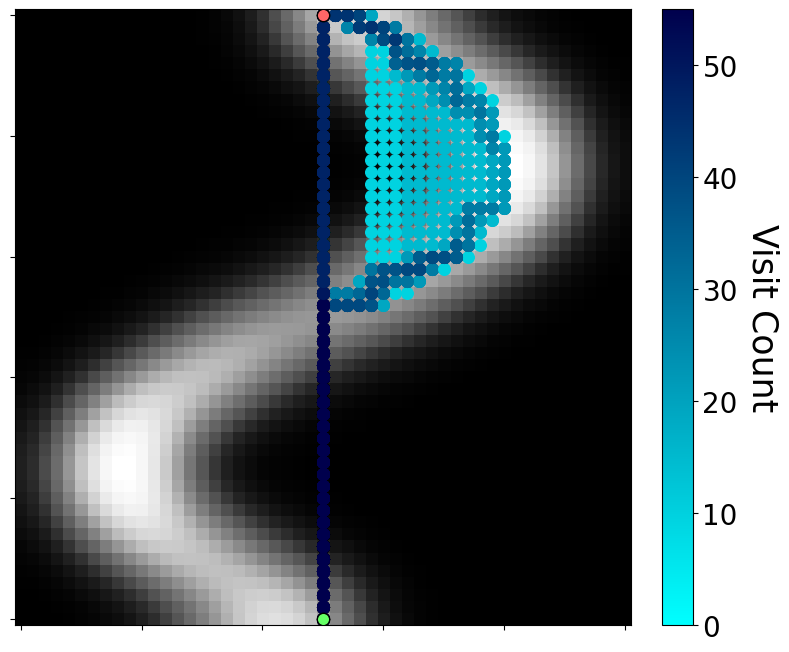

Processing SPEA2...


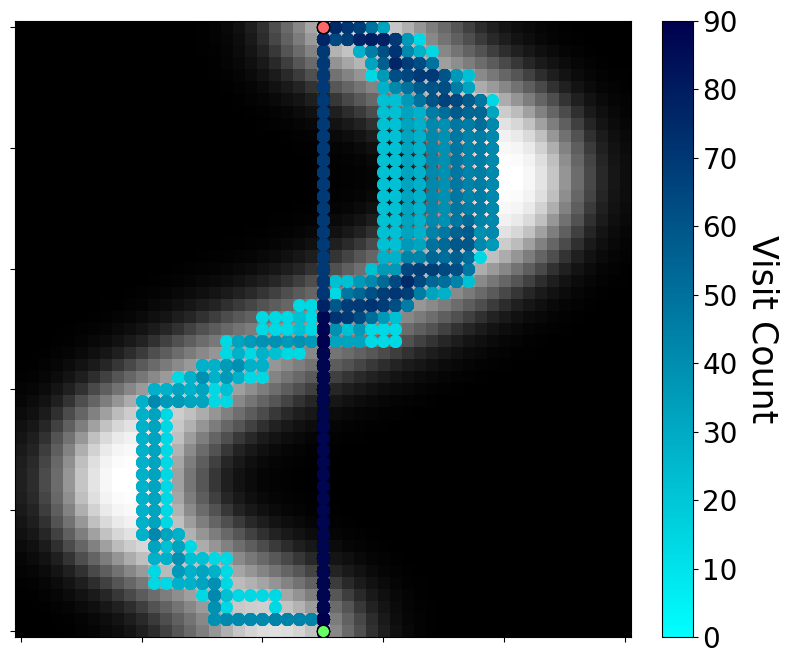

Processing NSGA3...


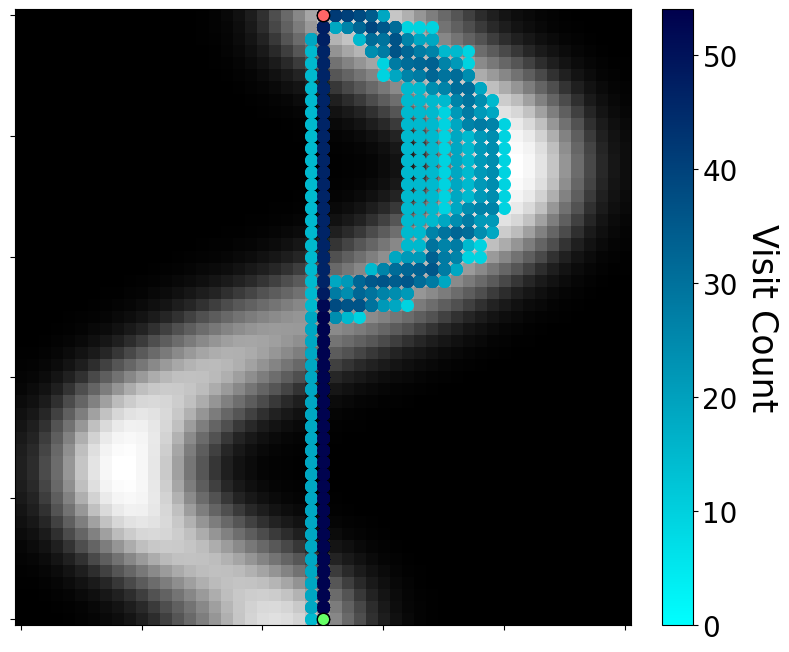

In [11]:
# plotting how often a path is taken based on the color
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LinearSegmentedColormap, Normalize

class ObstacleMapGenerator:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def create_meandering_river_obstacles(self):
        obstacles = np.zeros((self.height, self.width))
        river_width = 7
        t = np.linspace(0, 1, self.height)
        x_center = self.width / 2
        amplitude = self.width / 3
        x_path = x_center + amplitude * np.sin(2 * np.pi * t)
        for y, x in enumerate(x_path):
            x_start = int(x - river_width / 2)
            x_end = int(x + river_width / 2)
            obstacles[y, max(x_start, 0):min(x_end, self.width)] = 1
        obstacles = gaussian_filter(obstacles, sigma=3)
        obstacles = 1 - obstacles
        obstacles = (obstacles - np.min(obstacles)) / (np.max(obstacles) - np.min(obstacles))
        return obstacles

    def create_radial_gradient_obstacles(self):
        center_x, center_y = self.width // 2, self.height // 2
        x = np.arange(self.width)
        y = np.arange(self.height)
        xx, yy = np.meshgrid(x, y)
        distances = np.sqrt((xx - center_x)**2 + (yy - center_y)**2)
        normalized_distances = distances / np.max(distances)
        radial_gradient = 1 - normalized_distances
        return radial_gradient

    def create_sinusoidal_obstacles(self):
        x = np.linspace(0, 5 * np.pi, self.width)
        y = np.linspace(0, 5 * np.pi, self.height)
        x, y = np.meshgrid(x, y)
        sinusoidal_obstacles = np.sin(x) * np.cos(y)
        sinusoidal_obstacles = (sinusoidal_obstacles - sinusoidal_obstacles.min()) / (sinusoidal_obstacles.max() - sinusoidal_obstacles.min())
        return sinusoidal_obstacles

    def create_gradient_obstacles(self):
        gradient = np.zeros((self.height, self.width))
        for i in range(self.height):
            for j in range(self.width):
                distance_to_diagonal = abs(i - j)
                max_distance = max(self.height, self.width) - 1
                normalized_distance = distance_to_diagonal / max_distance
                gradient[i, j] = 0.5 * (1 - normalized_distance)
                if i > j:
                    gradient[i, j] = 1 - gradient[i, j]
                else:
                    gradient[i, j] = gradient[i, j]
        return gradient

    def plot_obstacles_and_paths(self, map_name, all_paths, algo):
        if map_name == "River Environment":
            obstacle_map = self.create_meandering_river_obstacles()
        elif map_name == "Radial Gradient Environment":
            obstacle_map = self.create_radial_gradient_obstacles()
        elif map_name == "Sinusoidal Environment":
            obstacle_map = self.create_sinusoidal_obstacles()
        elif map_name == "Linear Gradient Environment":
            obstacle_map = self.create_gradient_obstacles()
        else:
            raise ValueError(f"Unknown map name: {map_name}")

        fig, ax = plt.subplots(figsize=(10, 8))
        ax.imshow(obstacle_map, cmap='Greys', interpolation='nearest')

        # Initialize an array to count the number of visits to each cell
        visit_counts = np.zeros((self.height, self.width), dtype=int)

        # Use NumPy arrays to speed up the visit count
        for paths in all_paths:
            if paths:
                for path in paths:
                    path_array = np.array(path)
                    xs, ys = path_array[:, 0], path_array[:, 1]
                    visit_counts[xs, ys] += 1

        # Apply logarithmic scaling to spread out values
        log_visit_counts = np.log1p(visit_counts)  # log1p is used to avoid log(0)
        if log_visit_counts.max() > 0:
            log_visit_counts = log_visit_counts / log_visit_counts.max()

        # Define the colors you want in your colormap (from light cyan to very dark blue)
        colors = ['#00FFFF', '#00004D']
        cmap = LinearSegmentedColormap.from_list('CyanToDarkBlue', colors)
        
        # Normalize the color scale
        vmin = visit_counts.min()
        vmax = visit_counts.max()
        norm = Normalize(vmin=vmin, vmax=vmax)
        
        # Overlay the paths with colors based on the log-scaled visit counts
        for paths in all_paths:
            if paths:
                for path in paths:
                    x_coords, y_coords = zip(*path)
                    for (x, y) in zip(x_coords, y_coords):
                        ax.scatter(y, x, color=cmap(log_visit_counts[x, y]), s=70)

        # Add the colorbar to the plot
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
        cbar.set_label('Visit Count', rotation=270, labelpad=30, fontsize=25)
        cbar.ax.tick_params(labelsize=20)
        plt.xlim(-0.5, self.width-0.5)
        plt.ylim(-0.5, self.height-0.5)
        plt.gca().invert_yaxis()
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        #plt.xlabel('X coordinate')
        #plt.ylabel('Y coordinate')
        plt.grid(False)

        # Optionally, scatter start and end points in specific colors
        coordinates = [(25, 50), (25, 0)]  # Replace with your specific coordinates
        colors = ['#66FF66', '#FF6666']
        for (x, y), color in zip(coordinates, colors):
            plt.scatter(x, y, color=color, s=80, zorder=5, edgecolors='black')  # Adjust 's' for marker size

        plt.show()

def split_paths(paths):
    split_paths = []
    current_path = []

    for i in range(len(paths)):
        current_path.append(paths[i])
        if i < len(paths) - 1 and paths[i] == (0, 25) and paths[i + 1] == (50, 25):
            split_paths.append(current_path)
            current_path = []
    
    if current_path:
        split_paths.append(current_path)
    
    return split_paths

def process_algorithms(root_folder, algorithms, map_name):
    for algo in algorithms:
        algo_stripped = algo.strip('_')[:-2].rstrip('_')  # Clean the algorithm name
        print(f"Processing {algo_stripped}...")
        all_paths = []
        for subdir, _, files in os.walk(root_folder):
            if algo in os.path.basename(subdir):
                for file in files:
                    if file == 'optLog.csv':
                        file_path = os.path.join(subdir, file)
                        try:
                            df = pd.read_csv(file_path)
                        except Exception as e:
                            print(f"Error reading {file_path}: {e}")
                            continue

                        last_row = df.iloc[-1]
                        paths_str = last_row[' paths']
                        try:
                            paths = ast.literal_eval(paths_str)
                        except Exception as e:
                            print(f"Error parsing paths in {file_path}: {e}")
                            continue

                        paths = split_paths(paths)
                        all_paths.extend(paths)

        # Initialize obstacle map generator
        generator = ObstacleMapGenerator(width=51, height=51)
        generator.plot_obstacles_and_paths(map_name, [all_paths], algo_stripped)  # Pass the cleaned algorithm name


# Define the root folder path
root_folder = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/bugfree S3 shift data/meanderingRiverObstacles'

# List of algorithms
algorithms = [
    #"_AGEMOEA_0", "_DNSGA2_0",  "_NSGA2_0", "_NSGA3_0", "_RNSGA2_0", "_SMSEMOA_0", "_SPEA2_0"#,
    #"_AGEMOEA_1_42"#,  "_DNSGA2_1",  "_NSGA2_1", "_NSGA3_1", "_RNSGA2_1", "_SMSEMOA_1", "_SPEA2_1"
    #"_AGEMOEA_2",  "_DNSGA2_2",  "_NSGA2_2", "_NSGA3_2", "_RNSGA2_2", "_SMSEMOA_2", "_SPEA2_2"
    #"_AGEMOEA_3",  "_DNSGA2_3",  "_NSGA2_3", "_NSGA3_3", "_RNSGA2_3", "_SMSEMOA_3", "_SPEA2_3"#,
    #"_AGEMOEA_4",  "_DNSGA2_4",  "_NSGA2_4", "_NSGA3_4", "_RNSGA2_4", "_SMSEMOA_4", "_SPEA2_4"#,
    #"_AGEMOEA_5_42"#,  "_DNSGA2_5",  "_NSGA2_5", "_NSGA3_5", "_RNSGA2_5", "_SMSEMOA_5", "_SPEA2_5"
    
    #"_NSGA2_5", "_NSGA2_4", "_NSGA2_3", "_NSGA2_2", "_NSGA2_1"#, 
    #"_SPEA2_1", "_SPEA2_2", "_SPEA2_3", "_SPEA2_4", "_SPEA2_5"
    #"_AGEMOEA_5", "_AGEMOEA_4", "_AGEMOEA_3", "_AGEMOEA_2", "_AGEMOEA_1", 
    #"_DNSGA2_5", "_DNSGA2_4", "_DNSGA2_3", "_DNSGA2_2", "_DNSGA2_1", 
    #"_NSGA3_5", "_NSGA3_4", "_NSGA3_3", "_NSGA3_2", "_NSGA3_1", 
    #"_RNSGA2_5", "_RNSGA2_4", "_RNSGA2_3", "_RNSGA2_2", "_RNSGA2_1",
    #"_SMSEMOA_5", "_SMSEMOA_4", "_SMSEMOA_3", "_SMSEMOA_2", "_SMSEMOA_1"
    "_NSGA2_3", "_SMSEMOA_3", "_AGEMOEA_3", "_DNSGA2_3", "_RNSGA2_3", "_SPEA2_3", "NSGA3_3"
]

# Specify the map name to use
map_name = "River Environment"

# Process algorithms and plot paths
process_algorithms(root_folder, algorithms, map_name)


<>:55: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<>:55: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
/var/folders/mx/mgxw5ty52v78mpzwcxl8r2340000gn/T/ipykernel_30198/288215456.py:55: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
  gradient[i, j] = 0.5 (1 - normalized_distance)


Processing AGEMOEA_1...


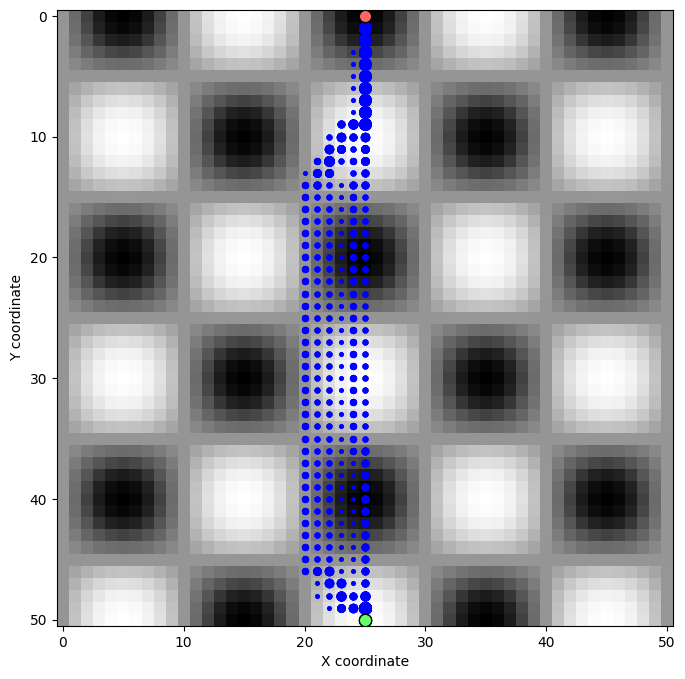

In [28]:
# plotting how often a path is taken based on the size of the dot
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LinearSegmentedColormap

class ObstacleMapGenerator:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def create_meandering_river_obstacles(self):
        obstacles = np.zeros((self.height, self.width))
        river_width = 7
        t = np.linspace(0, 1, self.height)
        x_center = self.width / 2
        amplitude = self.width / 3
        x_path = x_center + amplitude * np.sin(2 * np.pi * t)
        for y, x in enumerate(x_path):
            x_start = int(x - river_width / 2)
            x_end = int(x + river_width / 2)
            obstacles[y, max(x_start, 0):min(x_end, self.width)] = 1
        obstacles = gaussian_filter(obstacles, sigma=3)
        obstacles = 1 - obstacles
        obstacles = (obstacles - np.min(obstacles)) / (np.max(obstacles) - np.min(obstacles))
        return obstacles

    def create_radial_gradient_obstacles(self):
        center_x, center_y = self.width // 2, self.height // 2
        x = np.arange(self.width)
        y = np.arange(self.height)
        xx, yy = np.meshgrid(x, y)
        distances = np.sqrt((xx - center_x)**2 + (yy - center_y)**2)
        normalized_distances = distances / np.max(distances)
        radial_gradient = 1 - normalized_distances
        return radial_gradient

    def create_sinusoidal_obstacles(self):
        x = np.linspace(0, 5 * np.pi, self.width)
        y = np.linspace(0, 5 * np.pi, self.height)
        x, y = np.meshgrid(x, y)
        sinusoidal_obstacles = np.sin(x) * np.cos(y)
        sinusoidal_obstacles = (sinusoidal_obstacles - sinusoidal_obstacles.min()) / (sinusoidal_obstacles.max() - sinusoidal_obstacles.min())
        return sinusoidal_obstacles

    def create_gradient_obstacles(self):
        gradient = np.zeros((self.height, self.width))
        for i in range(self.height):
            for j in range(self.width):
                distance_to_diagonal = abs(i - j)
                max_distance = max(self.height, self.width) - 1
                normalized_distance = distance_to_diagonal / max_distance
                gradient[i, j] = 0.5 (1 - normalized_distance)
                if i > j:
                    gradient[i, j] = 1 - gradient[i, j]
                else:
                    gradient[i, j] = gradient[i, j]
        return gradient

    def plot_obstacles_and_paths(self, map_name, all_paths, algo):
        if map_name == "River Environment":
            obstacle_map = self.create_meandering_river_obstacles()
        elif map_name == "Radial Gradient Environment":
            obstacle_map = self.create_radial_gradient_obstacles()
        elif map_name == "Sinusoidal Environment":
            obstacle_map = self.create_sinusoidal_obstacles()
        elif map_name == "Linear Gradient Environment":
            obstacle_map = self.create_gradient_obstacles()
        else:
            raise ValueError(f"Unknown map name: {map_name}")

        plt.figure(figsize=(8, 8))
        plt.imshow(obstacle_map, cmap='Greys', interpolation='nearest')

        # Initialize an array to count the number of visits to each cell
        visit_counts = np.zeros((self.height, self.width))

        # Count visits
        for paths in all_paths:
            if paths:
                for path in paths:
                    for (x, y) in path:
                        visit_counts[x, y] += 1

        # Normalize visit counts to range between 10 and 50
        min_size = 2
        max_size = 70
        normalized_visit_counts = np.interp(visit_counts, (visit_counts.min(), visit_counts.max()), (min_size, max_size))

        # Overlay the paths with dots whose size corresponds to the visit count
        for paths in all_paths:
            if paths:
                for path in paths:
                    x_coords, y_coords = zip(*path)
                    for (x, y) in zip(x_coords, y_coords):
                        plt.scatter(y, x, color='blue', s=normalized_visit_counts[x, y])

        plt.xlim(-0.5, self.width-0.5)
        plt.ylim(-0.5, self.height-0.5)
        plt.gca().invert_yaxis()
        plt.xlabel('X coordinate')
        plt.ylabel('Y coordinate')
        plt.grid(False)

        # Optionally, scatter start and end points in specific colors
        coordinates = [(25, 50), (25, 0)]  # Replace with your specific coordinates
        colors = ['#66FF66', '#FF6666']
        for (x, y), color in zip(coordinates, colors):
            plt.scatter(x, y, color=color, s=80, zorder=5, edgecolors='black')  # Adjust 's' for marker size

        plt.show()


def split_paths(paths):
    split_paths = []
    current_path = []

    for i in range(len(paths)):
        current_path.append(paths[i])
        if i < len(paths) - 1 and paths[i] == (0, 25) and paths[i + 1] == (50, 25):
            split_paths.append(current_path)
            current_path = []

    if current_path:
        split_paths.append(current_path)

    return split_paths

def process_algorithms(root_folder, algorithms, map_name):
    for algo in algorithms:
        algo_stripped = algo.strip('_')[:-2].rstrip('_')  # Clean the algorithm name
        print(f"Processing {algo_stripped}...")
        all_paths = []
        for subdir, _, files in os.walk(root_folder):
            if algo in os.path.basename(subdir):
                for file in files:
                    if file == 'optLog.csv':
                        file_path = os.path.join(subdir, file)
                        try:
                            df = pd.read_csv(file_path)
                        except Exception as e:
                            print(f"Error reading {file_path}: {e}")
                            continue

                        last_row = df.iloc[-1]
                        paths_str = last_row[' paths']
                        try:
                            paths = ast.literal_eval(paths_str)
                        except Exception as e:
                            print(f"Error parsing paths in {file_path}: {e}")
                            continue

                        paths = split_paths(paths)
                        all_paths.extend(paths)

        # Initialize obstacle map generator
        generator = ObstacleMapGenerator(width=51, height=51)
        generator.plot_obstacles_and_paths(map_name, [all_paths], algo_stripped)  # Pass the cleaned algorithm name


# Define the root folder path
root_folder = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/sinusoidalMap'

# List of algorithms
algorithms = [
    "_AGEMOEA_1_42"
]

# Specify the map name to use
map_name = "Sinusoidal Environment"

# Process algorithms and plot paths
process_algorithms(root_folder, algorithms, map_name)


Processing AGEMOEA_1...


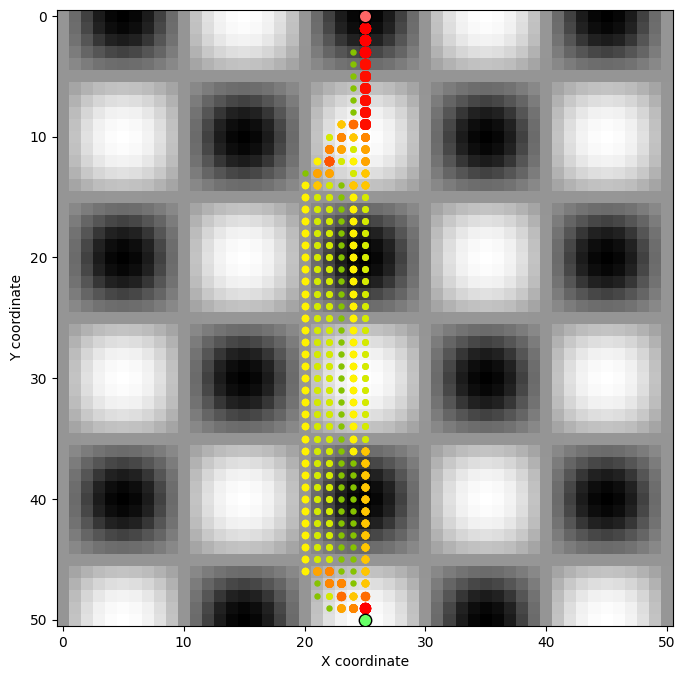

In [31]:
# plotting how often a path is taken based on the color and size of the dot
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LinearSegmentedColormap

class ObstacleMapGenerator:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def create_meandering_river_obstacles(self):
        obstacles = np.zeros((self.height, self.width))
        river_width = 7
        t = np.linspace(0, 1, self.height)
        x_center = self.width / 2
        amplitude = self.width / 3
        x_path = x_center + amplitude * np.sin(2 * np.pi * t)
        for y, x in enumerate(x_path):
            x_start = int(x - river_width / 2)
            x_end = int(x + river_width / 2)
            obstacles[y, max(x_start, 0):min(x_end, self.width)] = 1
        obstacles = gaussian_filter(obstacles, sigma=3)
        obstacles = 1 - obstacles
        obstacles = (obstacles - np.min(obstacles)) / (np.max(obstacles) - np.min(obstacles))
        return obstacles

    def create_radial_gradient_obstacles(self):
        center_x, center_y = self.width // 2, self.height // 2
        x = np.arange(self.width)
        y = np.arange(self.height)
        xx, yy = np.meshgrid(x, y)
        distances = np.sqrt((xx - center_x)**2 + (yy - center_y)**2)
        normalized_distances = distances / np.max(distances)
        radial_gradient = 1 - normalized_distances
        return radial_gradient

    def create_sinusoidal_obstacles(self):
        x = np.linspace(0, 5 * np.pi, self.width)
        y = np.linspace(0, 5 * np.pi, self.height)
        x, y = np.meshgrid(x, y)
        sinusoidal_obstacles = np.sin(x) * np.cos(y)
        sinusoidal_obstacles = (sinusoidal_obstacles - sinusoidal_obstacles.min()) / (sinusoidal_obstacles.max() - sinusoidal_obstacles.min())
        return sinusoidal_obstacles

    def create_gradient_obstacles(self):
        gradient = np.zeros((self.height, self.width))
        for i in range(self.height):
            for j in range(self.width):
                distance_to_diagonal = abs(i - j)
                max_distance = max(self.height, self.width) - 1
                normalized_distance = distance_to_diagonal / max_distance
                gradient[i, j] = 0.5 * (1 - normalized_distance)
                if i > j:
                    gradient[i, j] = 1 - gradient[i, j]
                else:
                    gradient[i, j] = gradient[i, j]
        return gradient

    def plot_obstacles_and_paths(self, map_name, all_paths, algo):
        if map_name == "River Environment":
            obstacle_map = self.create_meandering_river_obstacles()
        elif map_name == "Radial Gradient Environment":
            obstacle_map = self.create_radial_gradient_obstacles()
        elif map_name == "Sinusoidal Environment":
            obstacle_map = self.create_sinusoidal_obstacles()
        elif map_name == "Linear Gradient Environment":
            obstacle_map = self.create_gradient_obstacles()
        else:
            raise ValueError(f"Unknown map name: {map_name}")

        plt.figure(figsize=(8, 8))
        plt.imshow(obstacle_map, cmap='Greys', interpolation='nearest')

        # Initialize an array to count the number of visits to each cell
        visit_counts = np.zeros((self.height, self.width))

        # Count visits
        for paths in all_paths:
            if paths:
                for path in paths:
                    for (x, y) in path:
                        visit_counts[x, y] += 1

        # Normalize visit counts for dot size (range between 10 and 50)
        min_size = 10
        max_size = 50
        normalized_visit_counts = np.interp(visit_counts, (visit_counts.min(), visit_counts.max()), (min_size, max_size))

        # Normalize visit counts for color mapping
        log_visit_counts = np.log1p(visit_counts)  # log1p is used to avoid log(0)
        if log_visit_counts.max() > 0:
            log_visit_counts = log_visit_counts / log_visit_counts.max()

        # Define the colors you want in your colormap (from yellow to red)
        colors = ['green','yellow', 'red']
        cmap = LinearSegmentedColormap.from_list('GreenYellowRed', colors)

        # Overlay the paths with dots whose size and color correspond to the visit count
        for paths in all_paths:
            if paths:
                for path in paths:
                    x_coords, y_coords = zip(*path)
                    for (x, y) in zip(x_coords, y_coords):
                        plt.scatter(y, x, color=cmap(log_visit_counts[x, y]), s=normalized_visit_counts[x, y])

        plt.xlim(-0.5, self.width-0.5)
        plt.ylim(-0.5, self.height-0.5)
        plt.gca().invert_yaxis()
        plt.xlabel('X coordinate')
        plt.ylabel('Y coordinate')
        plt.grid(False)

        # Optionally, scatter start and end points in specific colors
        coordinates = [(25, 50), (25, 0)]
        colors = ['#66FF66', '#FF6666']
        for (x, y), color in zip(coordinates, colors):
            plt.scatter(x, y, color=color, s=80, zorder=5, edgecolors='black')  # Adjust 's' for marker size

        plt.show()


def split_paths(paths):
    split_paths = []
    current_path = []

    for i in range(len(paths)):
        current_path.append(paths[i])
        if i < len(paths) - 1 and paths[i] == (0, 25) and paths[i + 1] == (50, 25):
            split_paths.append(current_path)
            current_path = []

    if current_path:
        split_paths.append(current_path)

    return split_paths

def process_algorithms(root_folder, algorithms, map_name):
    for algo in algorithms:
        algo_stripped = algo.strip('_')[:-2].rstrip('_')  # Clean the algorithm name
        print(f"Processing {algo_stripped}...")
        all_paths = []
        for subdir, _, files in os.walk(root_folder):
            if algo in os.path.basename(subdir):
                for file in files:
                    if file == 'optLog.csv':
                        file_path = os.path.join(subdir, file)
                        try:
                            df = pd.read_csv(file_path)
                        except Exception as e:
                            print(f"Error reading {file_path}: {e}")
                            continue

                        last_row = df.iloc[-1]
                        paths_str = last_row[' paths']
                        try:
                            paths = ast.literal_eval(paths_str)
                        except Exception as e:
                            print(f"Error parsing paths in {file_path}: {e}")
                            continue

                        paths = split_paths(paths)
                        all_paths.extend(paths)

        # Initialize obstacle map generator
        generator = ObstacleMapGenerator(width=51, height=51)
        generator.plot_obstacles_and_paths(map_name, [all_paths], algo_stripped)  # Pass the cleaned algorithm name


# Define the root folder path
root_folder = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/sinusoidalMap'

# List of algorithms
algorithms = [
    "_AGEMOEA_1_42"
]

# Specify the map name to use
map_name = "Sinusoidal Environment"

# Process algorithms and plot paths
process_algorithms(root_folder, algorithms, map_name)


Processing AGEMOEA...


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (543,) + inhomogeneous part.

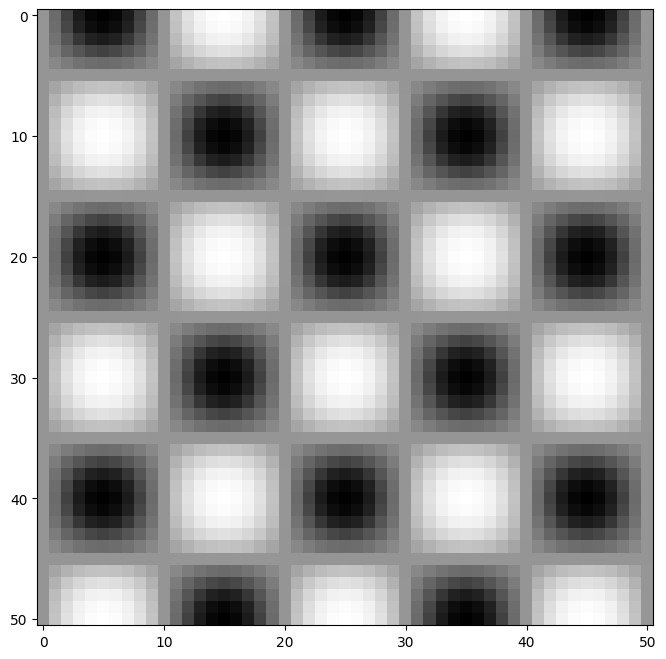